# Clustering de documents

## Imports

In [175]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [176]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /home/pav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/pav/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [247]:
data_path = "../../data/txt/"

## Clustering documents

In [248]:
# Choix de la décénnie
DECADE = '1930'

In [179]:
# Charger tous les fichiers de la décennie et en créer une liste de textes
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [180]:
# Exemple de fichiers
files[:5]

['KB_JB838_1930-01-05_01-00006.txt',
 'KB_JB838_1930-01-09_01-00001.txt',
 'KB_JB838_1930-01-09_01-00014.txt',
 'KB_JB838_1930-01-16_01-00010.txt',
 'KB_JB838_1930-01-20_01-00002.txt']

In [181]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [182]:
# Exemple de textes
texts[0][:400]

"15 G I C 3. L ^ SQ| R V .1- . FINANCE - INDUSTRIE - COMMERCE BOURSE de BRUXELLES I Marchés d’Anvers REVUE HEBDOMADAIRE La Eourse, qui avait très peu de chance de g.tg:v»r en aciivi.é penciant cette semaine raccourcie par le congé du Nouvel- Aii, a c i cependant une attitude qui permet de bien augurer des prochaines séances. L's capitalistes semblent enfin s’être rendu compte cours leur fou: quelqu"

### Vectoriser les documents à l'aide de TF-IDF

In [183]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [184]:
# Instancier le modèle TF-IDF avec ses arguments
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [185]:
# Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`
tfidf_vectors = vectorizer.fit_transform(texts)

/home/pav/Documents/ULB 2025-2026 TAC TP/tac/tac_venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [186]:
# Détail de la matrice
tfidf_vectors

<1000x3942 sparse matrix of type '<class 'numpy.float64'>'
	with 789606 stored elements in Compressed Sparse Row format>

In [187]:
# Imprimer le vecteur tf-IDF du premier document
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

id          0.455144
janvier     0.243864
disp        0.217844
no          0.189761
ld          0.180348
              ...   
entendre    0.000000
entendu     0.000000
entente     0.000000
entière     0.000000
♦           0.000000
Length: 3942, dtype: float64

### Tests: comparaison des vecteurs de 2 docs et calcul de leur distance

In [188]:
tfidf_array = tfidf_vectors.toarray()

In [189]:
# Vecteur du document 0
tfidf_array[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [190]:
# Vecteur du document 1
tfidf_array[1]

array([0.05956271, 0.        , 0.        , ..., 0.        , 0.        ,
       0.02573525])

In [191]:
cosine(tfidf_array[0], tfidf_array[1])

0.8606658574668415

### Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

In [224]:
# Définir un nombre initial de clusters
N_CLUSTERS = 4
# Testé avec 3,4,5,6

In [225]:
# Instancier le modèle K-Means et ses arguments
km_model = KMeans(n_clusters=N_CLUSTERS)

In [226]:
# Appliquer le clustering à l'aide de la fonction `fit_predict`
clusters = km_model.fit_predict(tfidf_vectors)

In [227]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [228]:
pprint(dict(clustering))

{0: ['KB_JB838_1930-01-24_01-00008.txt',
     'KB_JB838_1930-04-07_01-00009.txt',
     'KB_JB838_1930-05-08_01-00008.txt',
     'KB_JB838_1930-05-28_01-00009.txt',
     'KB_JB838_1930-06-20_01-00008.txt',
     'KB_JB838_1930-08-27_01-00007.txt',
     'KB_JB838_1930-09-21_01-00011.txt',
     'KB_JB838_1930-10-14_01-00009.txt',
     'KB_JB838_1930-10-26_01-00011.txt',
     'KB_JB838_1930-11-03_01-00007.txt',
     'KB_JB838_1930-11-10_01-00007.txt',
     'KB_JB838_1930-11-21_01-00008.txt',
     'KB_JB838_1930-12-23_01-00012.txt',
     'KB_JB838_1931-01-09_01-00008.txt',
     'KB_JB838_1931-02-21_01-00008.txt',
     'KB_JB838_1931-03-10_01-00009.txt',
     'KB_JB838_1931-03-24_01-00008.txt',
     'KB_JB838_1931-04-19_01-00013.txt',
     'KB_JB838_1931-04-27_01-00009.txt',
     'KB_JB838_1931-07-01_01-00009.txt',
     'KB_JB838_1931-07-16_01-00009.txt',
     'KB_JB838_1931-08-02_01-00011.txt',
     'KB_JB838_1931-08-03_01-00007.txt',
     'KB_JB838_1931-08-05_01-00008.txt',
     'KB_JB838_1

### Visualiser les clusters

In [229]:
# Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
# Cette étape est nécessaire afin de visualiser les documents dans un espace 2D
# https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [230]:
reduced_vectors[:10]

array([[-0.20617369,  0.00851725],
       [-0.24991349,  0.06358552],
       [ 0.01281754, -0.18086667],
       [ 0.50604625,  0.39697199],
       [-0.32169693,  0.10166626],
       [ 0.20311397, -0.49186667],
       [-0.1247206 , -0.04589015],
       [-0.26433298,  0.0204334 ],
       [ 0.08005685, -0.08560318],
       [ 0.25099757, -0.07204345]])

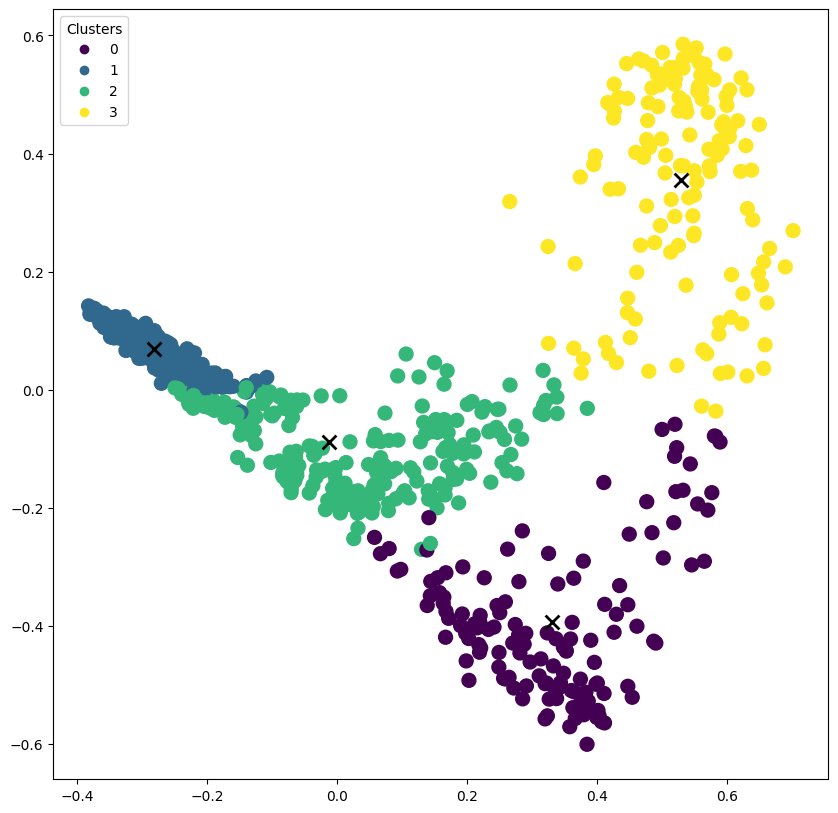

In [231]:
# Générer le plot
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

plt.savefig(f"./cluster_plot_{N_CLUSTERS}.png", dpi=300, bbox_inches="tight")  # save image

## Wordclouds

In [283]:
# Additional imports for wordclouds
from collections import Counter
from wordcloud import WordCloud
import nltk
import yake
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /home/pav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [837]:
# Additional stopwords (see TP2)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem"]

add_sw = ["Brux", "ecrire","écr", "ecr","brux", "BRUX","bruxelles", "Là","Av", "AV",
       "vend", "prix", "rue", "bon", "Ch", "CH", "ST", "Chff",
       "Tél", "tél", "très", "ans", "PL", "pl", "St",
       "téléph","gar","app", "trav", "ch", "CH", "Ch","pr", "Si", "si", "SI",
       "maison", "ag", "st", "fr", "louer", "conf", "garage", "jard", "vendre", "adr", "chf", "comment",
       "villa", "bel", "av", "km", "AV", "Av", "do", "ét", "avenue", "gr", "inst", "cond",
       "jardin", "rez", "ec", "él", "tél", "moderne", "petite", "belle", "mod", "où",
       "géomètre", "chauf", "télé", "chauff", "cave", "agence", "ii", "appart", "bd", "xl", "télép", "têl", "br",
       "tr", "studio", "leç", "chaussée", "bur", "appartem", "caves", "adrcs", "faç",
       "place", "cherche", "sal", "bain", "référ", "etc", "prés", "ds", "lo", "téléphone", "réf", "meub", "concierge",
       "comm", "dcm", "louise", "ot", "jo", "francs", "lr", "jne", "ouvr", "aven", "cuisine",
       "no", "cyl", "alors", "rr", "sér", "références", "ts", "ad", "référenc", "tt",
       "lcr", "mol", "dlt", "ll", "nf", "pers"
       ]
sw.extend(add_sw)
sw = set(sw)

## Process for a single cluster

In [838]:
# Group the text content of all files linked to a cluster (test)
CLUSTER_ID = 3 # Adapt parameter
text_in_cluster: str
files_in_cluster = clustering[CLUSTER_ID]  # liste des fichiers dans le cluster
for file in files_in_cluster:
    with open(os.path.join(data_path,file), 'r', encoding='utf-8') as f:
        text_in_cluster = ''.join(f.read())

text_in_cluster

'6 a-. tÀ u~- * 21 DECEMBRE 1939! V. 91.021 A Bf. RAFFINERIES OU CONGO BELGE, BRUXELLES PENS. do FAM., 14-21. r. Suisse (Porto Louise) Ch. et app. & Ion .-r avec ou s. pens. C, m. 42929E "BRirxÊLLES - ^" ïiois\' Pension «Les Libellules» 17; avenue Jeanne 17, chf.. etc. 25 fr. 9G6-5E PENSION REGINA 77, r. du Commerce. Tél. 11.02.10. Belles ch. t. cf. Prix tr. mod. 43158 E MONS. Ticiil, dé», pens. seul de p.réf. et nu centre Ecr. J. S. Boite Postale 909. Bruxelles. 17390E jAppartements.Chambres offres] Porte LOUISE. Appert, lux. meub., s, b. privée. 122. ch. <;harl?rol26526F 6, r. Gachard, XL. B..app. frnnç. mod., 0 p. s. .lie b. Inst., purq. chf. Truc modéré. ,\': 4337g F P.-A-T. conf. mod Ru» Ch~ Hanssen, 10. Tél lliftl.OO 3abl. 16453 F Gr. appart. meub LUXE et (lONF\'DRI 8 .v’pl. 1. «q.‘ UêoD Jac qilet (r,F,8tronhant) XL Tét 4i^S9.02 2943 I \'F FARclsi-GlLl.ES AT.\'béVàpp\'\' 2e êt 6 I* -f-eal de.b tnstal. cave. 81/. av Clémentine, 31 rêlèp 11\'50 90 29401 E BxJR. et hnbllnt. »am. 31,

In [839]:
# Tokenisation of text
words = nltk.wordpunct_tokenize(text_in_cluster)
voc = set(words)
print(f"{len(words)} words found in text_in_cluster ({len(voc)} different word forms)")

14728 words found in text_in_cluster (4210 different word forms)


In [840]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 1 and w.isalpha() and w.lower() not in sw]
kept_string = " ".join(kept)
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

3988 words kept (2723 different word forms)


### Vocabulary Analysis

In [841]:
# Récupération des mots les plus fréquents
fdist = nltk.FreqDist(kept)
fdist.most_common(30)

[('fille', 13),
 ('dame', 13),
 ('centre', 11),
 ('bonne', 11),
 ('eau', 10),
 ('culs', 10),
 ('demande', 10),
 ('présent', 10),
 ('fem', 10),
 ('lux', 9),
 ('cour', 9),
 ('midi', 9),
 ('bureau', 9),
 ('café', 9),
 ('situation', 9),
 ('neuf', 8),
 ('confort', 8),
 ('rem', 8),
 ('fl', 8),
 ('compt', 8),
 ('taverne', 8),
 ('serveuse', 8),
 ('courant', 8),
 ('travail', 8),
 ('belge', 7),
 ('porte', 7),
 ('salle', 7),
 ('beau', 7),
 ('cher', 7),
 ('gros', 7)]

In [842]:
# Récupération des mots qui apparaissent une fois
fdist.hapaxes()[:30]

['tà',
 'decembre',
 'bf',
 'raffineries',
 'congo',
 'fam',
 'suisse',
 'ion',
 'brirxêlles',
 'ïiois',
 'libellules',
 'jeanne',
 'regina',
 'belles',
 'ticiil',
 'postale',
 'jappartements',
 'appert',
 'privée',
 'harl',
 'gachard',
 'lie',
 'purq',
 'truc',
 'ru',
 'hanssen',
 'lliftl',
 'oo',
 'lonf',
 'dri']

In [843]:
# Identification des mots les plus longs
n = 30
sorted(voc, key=len, reverse=True)[:n]

['vaaàaamàmàààaaaaaaaaaav',
 'intkhfhovinciàlb',
 'vandenpeereboom',
 'professionnelle',
 'demonstratrices',
 'wvvvvvvvwséwvwv',
 'tnctylngrnphle',
 'internationaux',
 'vuudérstrueten',
 'ulmiuanlenalrr',
 'encyclopédique',
 'renseignements',
 'rembouroementa',
 'cinquantenaire',
 'correspondance',
 'représentation',
 'rapproohomont',
 'représentants',
 'démonstration',
 'remmalltcuses',
 'cjbjpixellofl',
 'jappartements',
 'representants',
 'repréeeutuiui',
 'circonstances',
 'lïqüïdïfarfie',
 'collaboration',
 'connaissances',
 'accordeoniste',
 'jçsêphxbaecfc']

### Extracting keywords

In [844]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [845]:
keywords = kw_extractor.extract_keywords(text_in_cluster)
print(text_in_cluster[:500])
print(keywords)

6 a-. tÀ u~- * 21 DECEMBRE 1939! V. 91.021 A Bf. RAFFINERIES OU CONGO BELGE, BRUXELLES PENS. do FAM., 14-21. r. Suisse (Porto Louise) Ch. et app. & Ion .-r avec ou s. pens. C, m. 42929E "BRirxÊLLES - ^" ïiois' Pension «Les Libellules» 17; avenue Jeanne 17, chf.. etc. 25 fr. 9G6-5E PENSION REGINA 77, r. du Commerce. Tél. 11.02.10. Belles ch. t. cf. Prix tr. mod. 43158 E MONS. Ticiil, dé», pens. seul de p.réf. et nu centre Ecr. J. S. Boite Postale 909. Bruxelles. 17390E jAppartements.Chambres offr
[('Rossel', 0.0021857408628184432), ('DEM', 0.0025131919824814028), ('RUE', 0.003612991201570626), ('Agence Rossel', 0.005200243771312589), ('Ecr', 0.00586621570225321), ('Tél', 0.007410954410547868), ('Ecrire', 0.0074691261282693695), ('place', 0.008827181020431927), ('cherche', 0.01058482637040615), ('louer', 0.011156687044063375), ('BRUXELLES', 0.011207095553599545), ('cherche place', 0.013101244316841556), ('bon', 0.015525577487531526), ('app', 0.017882603753227914), ('prix Agence Rossel', 

In [846]:
keywords_kept = kw_extractor.extract_keywords(kept_string)
print(kept_string)
print(keywords_kept)

tà decembre bf raffineries congo belge pens fam suisse porto ion pens brirxêlles ïiois pension libellules jeanne pension regina commerce belles cf mons ticiil dé pens seul nu centre boite postale jappartements chambres offres porte appert lux privée harl gachard frnnç lie purq truc modéré ru hanssen lliftl oo luxe lonf dri uêod jac qilet tét farclsi glll at bévàpp êt eal tnstal clémentine rêlèp bxjr hnbllnt am marronnier magn barriere gili building waterloo grandes pinces salit clift central usage loyer sch tez cii eomm cour uls évier lectr modér rè nia neuf jol bu reàu mr sérieux washington lux serre ttius cab toil tv privé slbatntél os pbrte namur so bonlfaee çin qüan air appartenu confort celtes facilités cham brjés méub petits aqueduc midi midi fm cuv rem fcron centre marché porcs ap cf conc superbe ap cent gde mnnr lard bnln lavabo bidet instnl eau évier foyer roi vts roi net splendide building neuf parc forest nppnrt frnnç salle culs équlp asenns terrasse vide poubelles para parl

In [847]:
# Garder les bigrammes et plus du texte du cluster choisi
kept_kw = []
for kw, score in keywords:
    words = kw.split()
    if len(words) >= 2:
        kept_kw.append(kw)
print(f"The text of the chosen cluster mentions these keywords:")
for n in kept_kw:
    print(n)

The text of the chosen cluster mentions these keywords:
Agence Rossel
cherche place
prix Agence Rossel
dem place concierge
JNE FILLE
l'AGENCE ROSSEL
Bruxelles cherche Jeune
PATISSERIE dem
BON HORLOGER Dem
dem place


In [848]:
# Garder les bigrammes et plus du texte nettoyé du cluster choisi
kept_kw = []
for kw, score in keywords_kept:
    words = kw.split()
    if len(words) >= 2:
        kept_kw.append(kw)
print(f"The text of the chosen cluster mentions these keywords:")
for n in kept_kw:
    print(n)

The text of the chosen cluster mentions these keywords:
reception mensualites larousse
fille sténo dactylo
prêts hypothécaires rangs
rem cause doub
comptant reception mensualites
cpt reception mensualites
reception mensualites bulletin
mensualites larousse médical
mensualites larousse universel
mensualites larousse ménager
gravures planches noir
gravure planches couleurs
magnifique volume pages
pages articles gravures
meublé salle manger
articles gravures planches
ail sténo dactylo
gravures planches cartes
sténo dactylo agen
planches couleurs planche
sténo dactylo demandée
mensualites bulletin souscription
sténo dactylo courant
memento encyclopédique larousse
planches noir couleurs
angl ail sténo
mhgnlflqtiè volume pages
alon salle manger
salle manger chambres
victor hugo victor
hugo victor hugo
clientèle grossistes représ
garçon courses petits
larousse forme magnifiques
forme magnifiques volumes
encyclopédique larousse forme
planches cartes noir
pièces salle installée
relie comptant r

### Nuage de mots

In [849]:
# Affichage des termes les plus fréquents
frequencies = Counter(kept_string.split())
print(frequencies.most_common(10))

[('fille', 13), ('dame', 13), ('centre', 11), ('bonne', 11), ('eau', 10), ('culs', 10), ('demande', 10), ('présent', 10), ('fem', 10), ('lux', 9)]


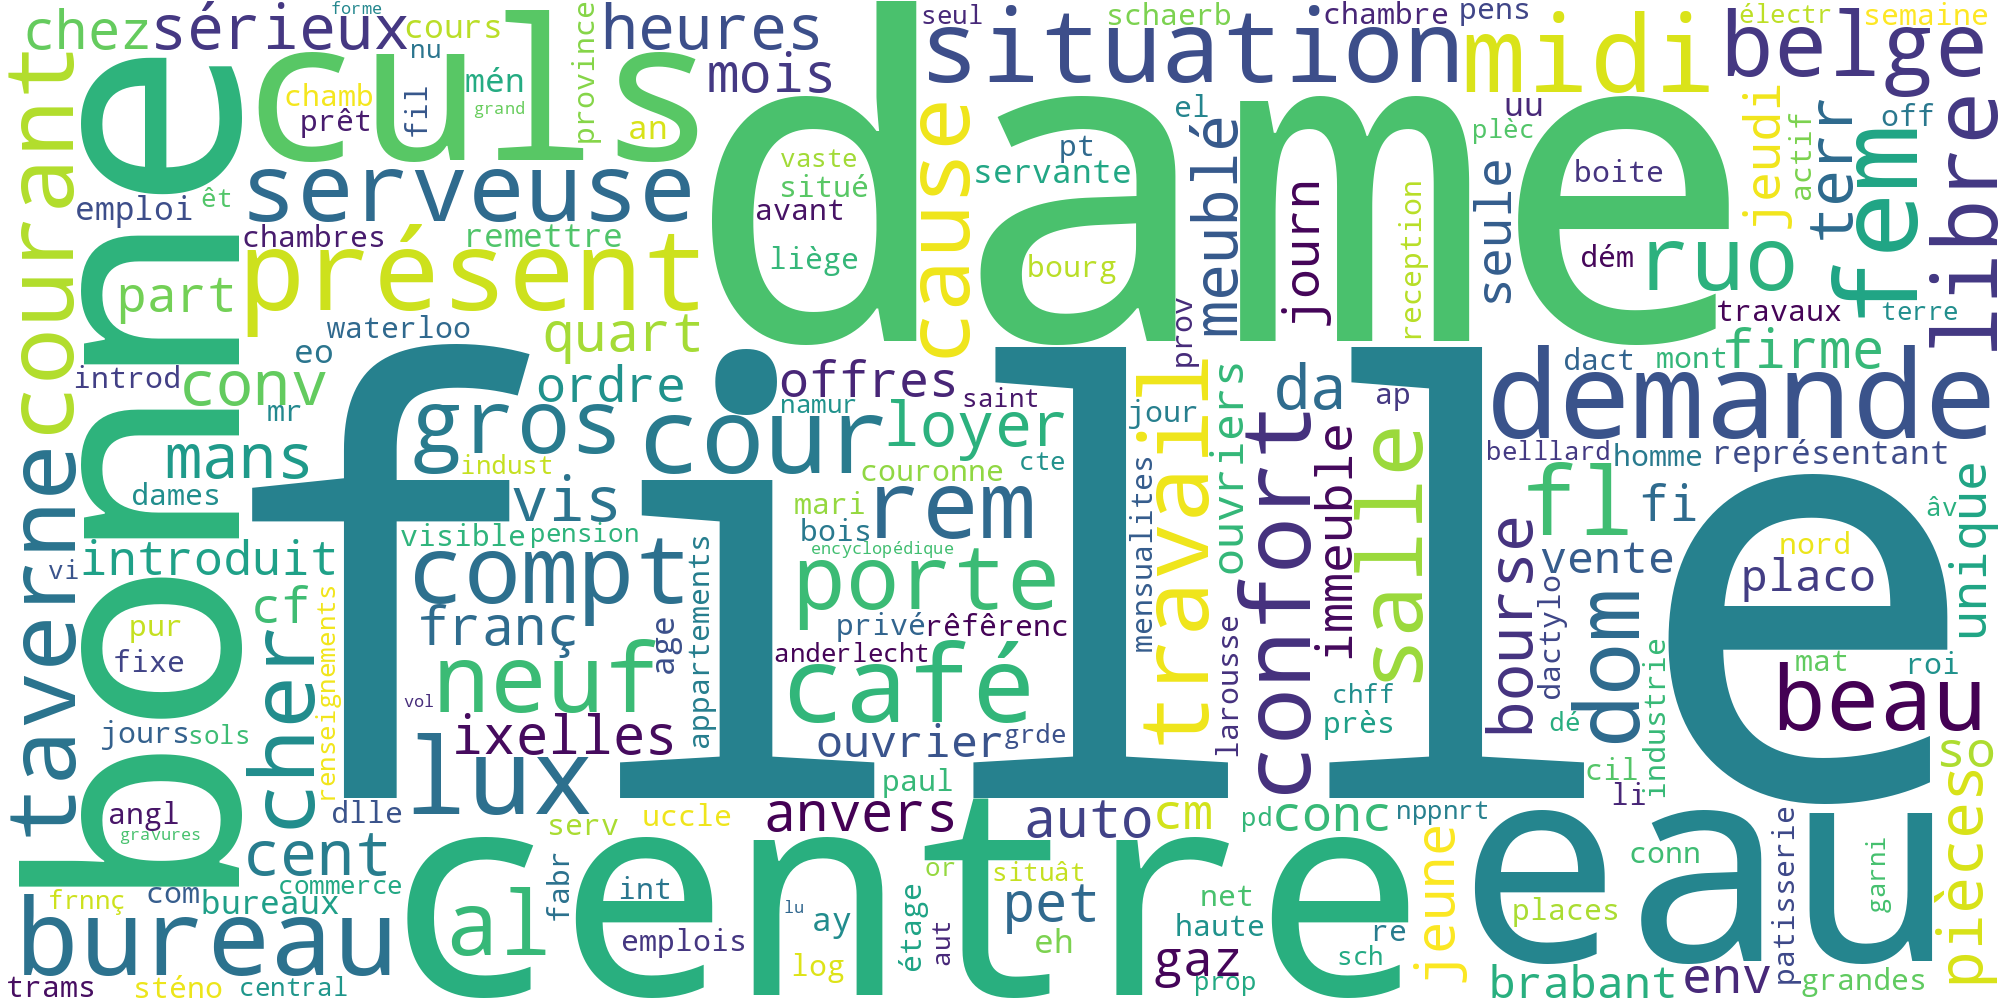

In [850]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join('./', f"{DECADE}s_cluster_{CLUSTER_ID}.png"))
Image(filename=os.path.join('./', f"{DECADE}s_cluster_{CLUSTER_ID}.png"))

## Automated Process for all clusters

In [851]:
# Group the text content of all files linked to clusters (test)
text_in_cluster : str
text_in_clusters = []
for n in range(0,N_CLUSTERS):
    files_in_cluster = clustering[n]  # liste des fichiers dans le cluster
    for file in files_in_cluster:
        with open(os.path.join(data_path,file), 'r', encoding='utf-8') as f:
            text_in_cluster = ''.join(f.read())
    text_in_clusters.append(text_in_cluster)

text_in_clusters[:10]

['r L 15 OCTOBRE 1939 LE SOIR Les produits laitiers belges GARANTIS, beurres et fromages, portent la MARQUE OFFICIELLE M CONTROLE de l’Office National du Donnez-leur votre préférence ! f Nous vous invitons à venir visiter, au SALON DE L\'ALIMENTATION (Heysel), le Stand de l\'Office Natibnal du LaiL où Ton vous donnera dé;’ prjk&ettX v £p^ vos achats de beurre et dë fromage et pù vous pourrez déguster les meilleurs produits laitiers belges. OFEIÇ£ NATfONAL dü LAIT * de ses DÉRIVÉS . #VS0USdàB CONTROLE DE L\'ETAT , < V -BEURRE p’HIVER (o N°000 NATIONALE ZU1VELDIENST ONDER RIJKSCONTROLE WIHTEftBOTER ■H Le beurre qui porte,cette.marque de contrôle È est GARANTI.\' Exigez-le. ENSEIGNEMENT 1 BERLITZ Etudes commerc. et financières Ecoles techniques supér. et second, de rl. E- p - : agrée es par l\'Etat 11, rue de Londres, 11 BRUXELLES . Gradue en sciences commerciales. Comptable. Secrétaire. Langues Nombreuse-? réferences d’employeurs. 331 "S S EXAMENS pour Emplois Admlnlst. Ec. Cadets Aviati

In [852]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [853]:
words = []
kept = []
kept_list_of_strings = []

for n in range(0,N_CLUSTERS):
    words.append(nltk.wordpunct_tokenize(text_in_clusters[n]))
    voc = set(words[n])
    print(f"{len(words[n])} words found in text_in_cluster {n} ({len(voc)} different word forms)")

    # Eliminer les stopwords et les termes non alphabétiques
    kept.append([w.lower() for w in words[n] if len(w) > 1 and w.isalpha() and w.lower() not in sw])
    kept_list_of_strings.append(" ".join(kept[n]))
    voc = set(kept[n])
    print(f"    {len(kept[n])} words kept ({len(voc)} different word forms)")


12721 words found in text_in_cluster 0 (3610 different word forms)
    3368 words kept (2339 different word forms)
10743 words found in text_in_cluster 1 (3483 different word forms)
    3978 words kept (2679 different word forms)
6295 words found in text_in_cluster 2 (2524 different word forms)
    2175 words kept (1745 different word forms)
14728 words found in text_in_cluster 3 (4210 different word forms)
    3988 words kept (2723 different word forms)


In [854]:
# Affichage des termes les plus fréquents
for n in range(0,N_CLUSTERS):
    frequencies[n] = Counter(kept_list_of_strings[n].split())
    print(frequencies[n].most_common(10))

[('rosine', 14), ('alex', 14), ('mal', 13), ('vis', 13), ('jeune', 13), ('cours', 12), ('ecole', 12), ('gaz', 11), ('pens', 10), ('jol', 10)]
[('jour', 16), ('noël', 16), ('décembre', 14), ('co', 13), ('polonaise', 12), ('quo', 12), ('dos', 11), ('so', 11), ('rubby', 11), ('roi', 10)]
[('kg', 9), ('achat', 8), ('lait', 8), ('uno', 8), ('quo', 8), ('jacques', 7), ('arnaud', 7), ('nu', 6), ('pur', 6), ('tours', 6)]
[('fille', 13), ('dame', 13), ('centre', 11), ('bonne', 11), ('eau', 10), ('culs', 10), ('demande', 10), ('présent', 10), ('fem', 10), ('lux', 9)]


In [855]:
for n in range(0,N_CLUSTERS):
    cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies[n])
    cloud.to_file(os.path.join('./', f"{DECADE}s_cluster_{n}.png"))
    Image(filename=os.path.join('./', f"{DECADE}s_cluster_{n}.png"))

## Find a specific word in selected files

In [862]:
word = "vis" # "pens", "cours", "rosinne"

for f in files:
    text = open(data_path + f, "r", encoding="utf-8").read()
    if word in text:
        print(f)

KB_JB838_1930-01-05_01-00006.txt
KB_JB838_1930-01-09_01-00001.txt
KB_JB838_1930-01-09_01-00014.txt
KB_JB838_1930-01-16_01-00010.txt
KB_JB838_1930-01-20_01-00002.txt
KB_JB838_1930-01-24_01-00008.txt
KB_JB838_1930-01-30_01-00006.txt
KB_JB838_1930-02-05_01-00005.txt
KB_JB838_1930-02-17_01-00013.txt
KB_JB838_1930-02-18_01-00012.txt
KB_JB838_1930-03-01_01-00004.txt
KB_JB838_1930-03-13_01-00003.txt
KB_JB838_1930-03-21_01-00004.txt
KB_JB838_1930-03-21_01-00015.txt
KB_JB838_1930-03-24_01-00013.txt
KB_JB838_1930-03-27_01-00012.txt
KB_JB838_1930-04-03_01-00004.txt
KB_JB838_1930-04-03_01-00014.txt
KB_JB838_1930-04-06_01-00007.txt
KB_JB838_1930-04-07_01-00003.txt
KB_JB838_1930-04-07_01-00009.txt
KB_JB838_1930-04-09_01-00015.txt
KB_JB838_1930-04-13_01-00014.txt
KB_JB838_1930-04-14_01-00006.txt
KB_JB838_1930-04-20_01-00006.txt
KB_JB838_1930-04-22_01-00006.txt
KB_JB838_1930-04-22_01-00014.txt
KB_JB838_1930-04-24_01-00013.txt
KB_JB838_1930-04-30_01-00015.txt
KB_JB838_1930-05-06_01-00008.txt
KB_JB838_1

# Word2Vec

In [3]:
# Imports
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

In [2]:
# Chargement et traitement des phrases du corpus
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

infile = f"../data/sents.txt"
sentences = MySentences(infile)

## Détection des bigrammes

In [3]:
bigram_phrases = Phrases(sentences)

In [4]:
type(bigram_phrases.vocab)

dict

In [5]:
len(bigram_phrases.vocab.keys())

15850647

In [6]:
# Clés
key_ = list(bigram_phrases.vocab.keys())[2310]
print(key_)

devant


In [7]:
# Score de cette occurence
bigram_phrases.vocab[key_]

31683

In [8]:
# Conversion des `Phrases` en objet `Phraser`
bigram_phraser = Phraser(phrases_model=bigram_phrases)

## Extraction des trigrammes

In [9]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [10]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

## Création d'un corpus d'unigrams, bigrams, trigrams

In [11]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [12]:
#print(corpus[:100])

## Entrainement d'un modèle Word2Vec su ce corpus

In [ ]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=10, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=10, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=6, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

CPU times: user 46 μs, sys: 0 ns, total: 46 μs
Wall time: 65.6 μs


NameError: name 'Word2Vec' is not defined

In [1]:
# Sauvegarde du modèle
outfile = f"../data/model_10_10.model"
#model.save(outfile)

## Exploration du modèle

In [4]:
# Chargement du modèle en mémoire
model = Word2Vec.load(outfile)

In [16]:
# Impression du vecteur d'un terme
model.wv["ministre"]

array([-7.8211803 , -2.030377  ,  6.2612195 , -3.1844587 , -3.6006052 ,
       12.296827  , -4.761478  , -2.1369648 , -7.4921513 , -1.3744888 ,
        6.6340413 ,  0.54723674,  2.3777733 ,  3.9085944 ,  8.680453  ,
        5.3702784 , -4.414628  , -0.0155044 ,  7.199474  , -8.585016  ,
        1.2222598 , -8.490955  , -0.8249617 , -6.7829833 ,  1.5991641 ,
       -6.777165  , -9.286478  ,  0.5825141 , -4.1596656 , -1.6093466 ,
       -6.775986  , -6.277128  ], dtype=float32)

In [5]:
# Calcul de la similarité entre deux termes
model.wv.similarity("ministre", "roi")

0.7279253

In [6]:
# Recherche des termes les plus proches d'un terme donné
model.wv.most_similar("ministre", topn=10)

[('premier_ministre', 0.9207103848457336),
 ('ministre_des_finances', 0.9030728936195374),
 ('chancelier', 0.8816391229629517),
 ('rapporteur', 0.8784811496734619),
 ('ministere', 0.876884400844574),
 ('president', 0.8687074780464172),
 ('mi_nistre', 0.8537359833717346),
 ('gouverneur_general', 0.8483253717422485),
 ('garde_des_sceaux', 0.8397819995880127),
 ('ancien_ministre', 0.8377547264099121)]

In [7]:
# Recherches complexes à travers l'espace vectoriel
print(model.wv.most_similar(positive=['paris', 'londres'], negative=['belgique']))

[('berlin', 0.8169171810150146), ('teheran', 0.7865206003189087), ('beyrouth', 0.7819308042526245), ('tokio', 0.7670552134513855), ('vienne', 0.7667638063430786), ('berlin_berlin', 0.765757143497467), ('rome', 0.7622876167297363), ('san_francisco', 0.7560376524925232), ('alger', 0.7527254819869995), ('moscou', 0.7461732029914856)]
